In [1]:
import pickle
import numpy as np
import collections
from scipy import stats
import math
import collections as col
import scipy
from matplotlib import pyplot as plt

# Entropie

# Question 1.1

In [2]:
def entropie(vect):
    compte = col.Counter(vect) # creation de l'histo sous forme dico
    proba = np.zeros(len(compte)) # initialisation vecteur proba
    for j,i in enumerate(compte): # pour chaque valeur calcul de sa probabilité
        proba[j] = compte[i] / len(vect)
       
        
    entrop = - np.sum(proba * np.log2(proba))# calcul de l'entropie 
    
    return entrop


In [3]:
vect = np.random.randint(0, 5, 100)
e = entropie(vect)
print(f'résultat vect : {e}\n')

vect2 = np.ones((100))
e2 = entropie(vect2)
print(f'résultat vect2 : {e2}\n')

vect3 = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print(np.log2(12))
e3 = entropie(vect3)
print(f'résultat vect3 : {e3}')

print(f'entropie min vect3: 0 , entropie max vect3: {np.log2(12)}')


résultat vect : 2.2889695442402997

résultat vect2 : -0.0

3.584962500721156
résultat vect3 : 3.584962500721156
entropie min vect3: 0 , entropie max vect3: 3.584962500721156


# Question 1.2

In [4]:
def entropie_cond(liste_vecteur):    
    
    #calcul p(Pi)
    proba_pi = np.zeros((len(liste_vecteur)))
    for i in range(len(liste_vecteur)):
        proba_pi[i] = len(liste_vecteur[i])
    proba_pi = proba_pi / np.sum(proba_pi)
    
    
    # calcul du nombre de classe maximale
    maxi = 0 
    for i in range(len(liste_vecteur)):
        courant = len(np.unique(liste_vecteur[i]))
        if courant > maxi:
            maxi = len(np.unique(liste_vecteur[i]))
            

    #calcul p(Y,Pi)
    proba_y_pi = np.zeros((len(liste_vecteur),maxi))      # initialisation vecteur proba
    for i in range(len(liste_vecteur)):
        compte = col.Counter(liste_vecteur[i])
        # creation de l'histo sous forme dico 
        for j in compte: 
            proba_y_pi[i,int(j)] = compte[int(j)]
            
    proba_y_pi = proba_y_pi / np.sum(proba_y_pi)
    
    
    #p(Y,Pi) = P(Y/Pi)*Pi
    #p(Y/pi) = P(Y,Pi)/Pi
    
    proba_y_s_pi = np.zeros((len(liste_vecteur),maxi))
    for i in range(maxi):
        proba_y_s_pi[:,i] = proba_y_pi[:,i] / proba_pi
       
    #entropie label
    entrop_labels = - np.sum(proba_y_s_pi * np.log2(proba_y_s_pi),axis=1)
    
    #entropie conditionnelle
    entrop_cond = np.sum(proba_pi*entrop_labels)
    
    return entrop_cond


In [5]:
# 5 clases étiquettée de 0 à 4 avec une longueur variable de chaque partition
partition = [np.random.randint(0, 5, 50),np.random.randint(0, 5, 40), np.random.randint(0, 5, 30)]
e = entropie_cond(partition)
print(e)

2.22805156596533


# Question 1.3

In [6]:
# data : tableau ( films , features ) , id2titles : dictionnaire id -> titre ,
# fields : id feature -> nom
[ data,id2titles,fields] = pickle.load(open("imdb_extrait.pkl" ,"rb" ))
# la derniere colonne est le vote
datax = data[: ,:32]
datay = np . array ([1 if x[33] >6.5 else -1 for x in data])

In [26]:
# récupérer uniquement les données binaires 
datax2 = datax[:,0]
dic=[0]
for i in range(1,datax.shape[1]):
    if len(np.unique(datax[:,i])) == 2:
        if np.unique(datax[:,i])[0] == 0 and np.unique(datax[:,i])[1] == 1:
            datax2 = np.vstack((datax2,datax[:,i]))    
            dic.append(i)
datax2= datax2.T
print(f'verification de la shape : {datax2.shape}')
print(f'verification données binaire {np.unique(datax2)}')
print(f'indice des colonnes utilisées: {dic}')

verification de la shape : (4587, 23)
verification données binaire [0. 1.]
indice des colonnes utilisées: [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27]


In [28]:
liste_entropie = []
for i in range(datax2.shape[1]):
    liste_entropie.append(entropie(datax2[:,i]))
    
print(f'liste entropie: \n {liste_entropie}')

liste entropie: 
 [0.564976837274551, 0.7256620117131098, 0.7540946843905093, 0.2634038042219715, 0.1926285852674641, 0.9487805443246595, 0.2653268692430364, 0.5347013539632184, 0.040466328209344704, 0.9104758524619008, 0.13310901662996316, 0.49425468209811785, 0.00786173698629584, 0.9999176833887986, 0.8103265236207233, 0.058438060605145864, 0.17702726334400468, 0.22865199105519707, 0.45026771320199777, 0.6915486835207777, 0.5144914462944487, 0.19699814392010093, 0.3061179094676092]


In [30]:
partition0 = np.argwhere(datay == -1 )
partition1 = np.argwhere(datay == 1 )
liste_entropie_cond=[]
for i in range(datax2.shape[1]):
    p0=[]
    for j in partition0:
        p0.append(int(datax2[j,i]))
    p0=np.array(p0)
    p1=[]
    for j in partition1:
        p1.append(int(datax2[j,i]))
    p1=np.array(p1)
    partition= [p0,p1]
    liste_entropie_cond.append(entropie_cond(partition))

print(f'liste entropie conditionnelle: \n {liste_entropie_cond}')

liste entropie conditionnelle: 
 [0.5590143613080911, 0.7249927985292708, 0.7540918637247791, 0.2611674398964769, 0.1926118695753076, 0.9327793836008456, 0.2562269508018687, 0.5120077273666231, nan, 0.8990239939110964, 0.13107563937186645, 0.4941281998713991, nan, 0.9392556483385359, 0.7938884815131095, 0.057182279638527816, 0.17456725571692763, 0.21501406489822736, 0.44838615981212077, 0.6912767600390852, 0.512208905013732, 0.1969965315043794, 0.285033154789921]


/tmp/ipykernel_31627/2914634797.py:37: RuntimeWarning: divide by zero encountered in log2
  entrop_labels = - np.sum(proba_y_s_pi * np.log2(proba_y_s_pi),axis=1)
/tmp/ipykernel_31627/2914634797.py:37: RuntimeWarning: invalid value encountered in multiply
  entrop_labels = - np.sum(proba_y_s_pi * np.log2(proba_y_s_pi),axis=1)


In [31]:
# Différence entropie / entropie cond
liste_diff=[]
for i in range(len(liste_entropie)):
    liste_diff.append(liste_entropie[i]-liste_entropie_cond[i])
liste=[]
for i in np.argsort(liste_diff):
    liste.append(dic[i])
    
print(f'attributs ordonnés par ordre : {liste}')
print(f'Meilleur attribut pour la première partition : {liste[0]}')


attributs ordonnés par ordre : [26, 2, 4, 14, 23, 1, 19, 22, 13, 3, 24, 20, 0, 6, 12, 21, 5, 18, 27, 7, 17, 8, 15]
Meilleur attribut pour la première partition : 26


En effectuant la différence entre l'entropie et l'entropie conditionnelle , on obtient l'entropie jointe car on est en log.
  
L'entropie mesure la quantité d'information / aléa d'une V.A.: plus elle est grande plus le desordre est grand , nulle = pas d'aléa
l'entropie conditionnelle est la quantité d'information / aléa dans 2 ou plus V.A.
l'entropie jointe est la quantité d'info / aléa ou gain d'information que l'on cherche à maximiser (donc minimiser l'entropie conditionnelle)

#les valeurs proche de 0 n'apporte que peut d'explication alors que les valeurs proches de 1 apporte le plus d'information
'''


# Expérience préliminaires

# Question 1.4

In [32]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus
id2genre = [x[1] for x in sorted(fields.items())[:-2]]
dt = DTree ()
dt.max_depth = 5 # on fixe la taille max de l ’ arbre a 5
dt.min_samples_split = 10 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax,datay)
print(dt.predict(datax[:5 ,:]))
print(dt.score(datax,datay))
# utiliser http :// www . webgraphviz . com / par exemple ou https :// dreampuf . github . io / Graphviz
export_graphviz(dt,out_file = "tmp/tree5bis.dot " , feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz(dt,feature_names = id2genre)
pydotplus.graph_from_dot_data(tdot).write_pdf('tmp/tree5bis.pdf')

[-1  1  1 -1 -1]
0.7362110311750599


True

In [13]:
# fonction pour faire des DT plus simplement 
def DTgeneration(x,y,profondeur,min_split=2,save_file=False, perf = True):
    dt = DTree()
    dt.max_depth = profondeur #on fixe la taille max de l’arbre
    dt.min_samples_split = min_split #nombre minimum d’exemples pour spliter un noeud
    dt.fit(x,y) 
    if save_file:
        tdot = export_graphviz(dt,feature_names=id2genre)
        pydotplus.graph_from_dot_data(tdot).write_pdf('tmp/tree_'+str(profondeur)+'.pdf')
    if perf:
        print(dt.score(datax,datay))
    return dt

In [33]:
dt = DTgeneration(datax,datay,20,min_split=2,save_file=True, perf = True)

0.9893176367996512


En augmentant la profondeur max, il y a de plus en plus d'exemple uniquement d'un coté de l'arbre. il y a du surapprentissage avec chaque exemple enregistré

# Question 1.5

In [15]:
y=[]
x=[]
for i in range(2,30):
    dt = DTree ()
    dt.max_depth = i # on fixe la taille max de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit(datax,datay)
    dt.predict(datax[:5 ,:])
    print(dt.score(datax,datay))
    y.append(dt.score(datax,datay))
    x.append(i)

0.6825812077610639
0.7183344233703945
0.7325049051667757
0.736647045999564
0.762589928057554
0.775888380204927
0.7996511881403968
0.8240680183126227
0.8495748855461086
0.8742097231305864
0.893612382821016
0.9119250054501853
0.9313276651406148
0.947460213647264
0.959886636145629
0.9688249400479616
0.9784172661870504
0.9849574885546108
0.9899716590364073
0.9917157183344234
0.9941137998691956
0.9960758665794637
0.9973839110529757
0.9982559407019839
0.9989099629387399
0.9989099629387399
0.999345977763244
0.999345977763244


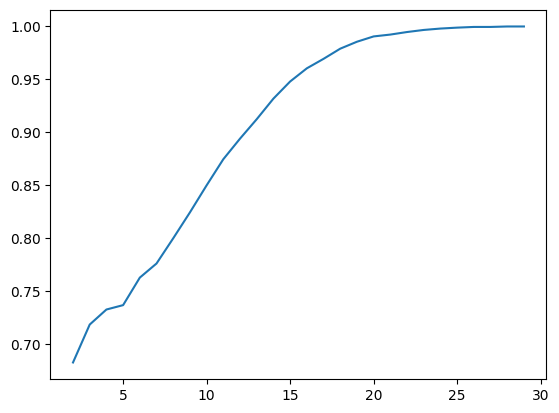

In [16]:
#evolution des scores de bonne classification en fonction du nombre de noeuds
plt.plot(x,y)

1.5
Plus l'arbre est profond plus la prediction sur les meme données est bonnes
Environ 73% pour une profondeur de 5 contre 98% pour une profondeur de 20 et 100% pour une profondeur de 50 
Cependant il existe très probablement du surapprentissage et il va fallair étudier sur un echantillon de test


# Question 1.6


cette indicateur n'est pas fiable car sur données train. Il faudrait évaluer sur des données tests

# Sur et sous apprentissage

# Question 1.7

In [17]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus

In [18]:
def partitionnement(datax,datay,pourc_train):        # fonction pour partitionner les données ent train test
    limite = int(pourc_train/100*data.shape[0])
    datax_train = datax[:limite]
    datay_train = datay[:limite]
    datax_test = datax[limite:]
    datay_test = datay[limite:]
    
    return datax_train,datay_train,datax_test,datay_test


In [19]:
def DTgen(x,y,profondeur,min_split=2):
    dt = DTree()
    dt.max_depth = profondeur #on fixe la taille max de l’arbre
    dt.min_samples_split = min_split #nombre minimum d’exemples pour spliter un noeud
    dt.fit(x,y)
    return dt

20 % 80 %


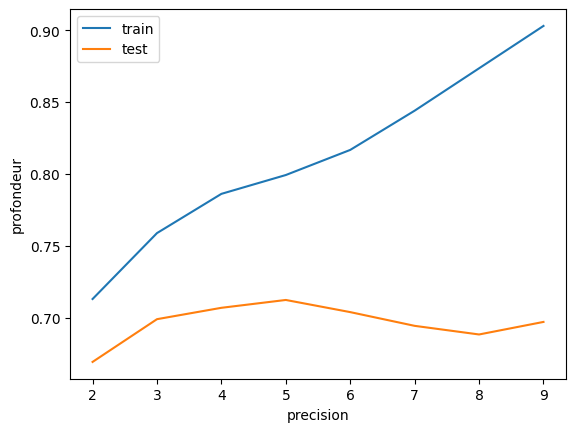

30 % 70 %


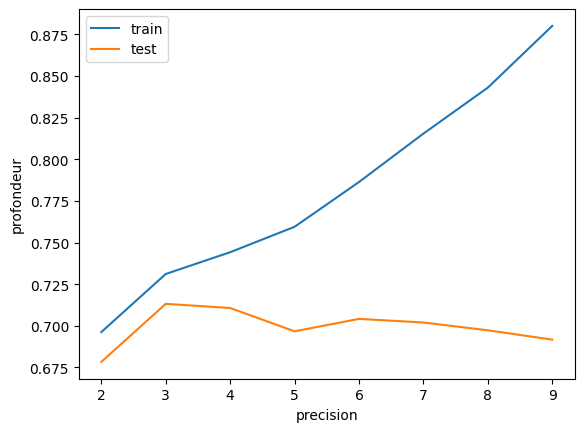

40 % 60 %


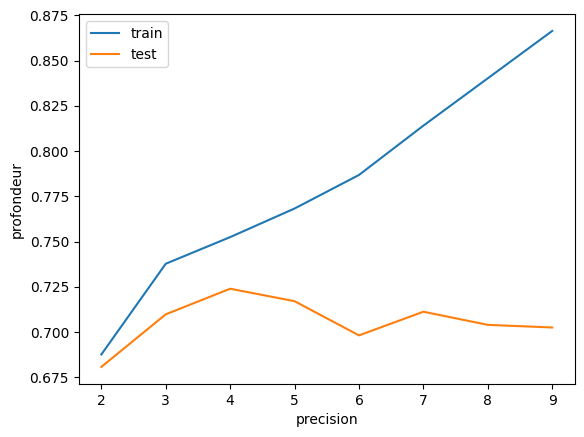

50 % 50 %


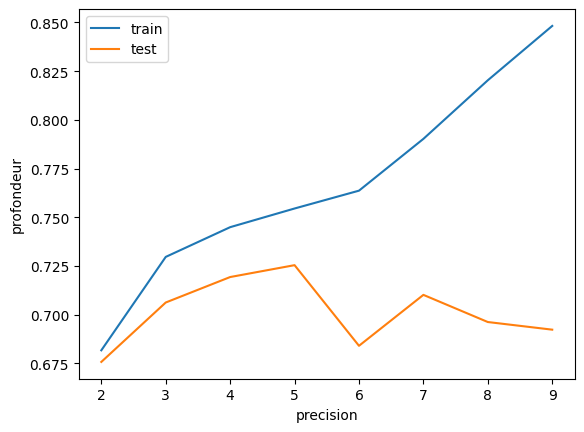

60 % 40 %


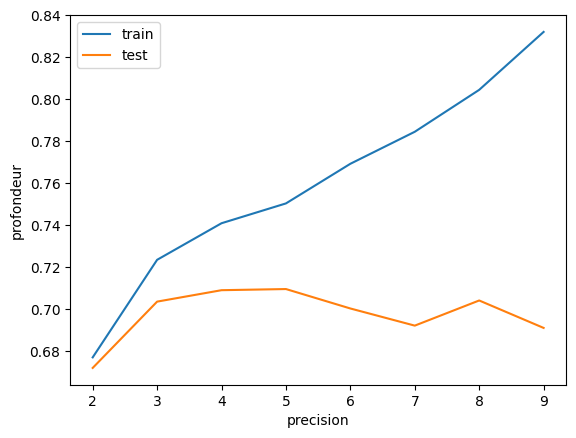

70 % 30 %


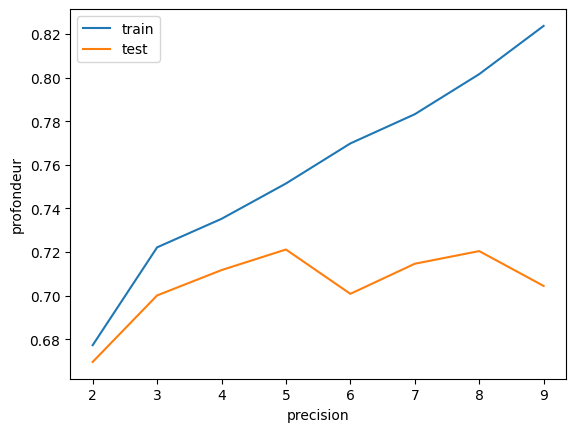

80 % 20 %


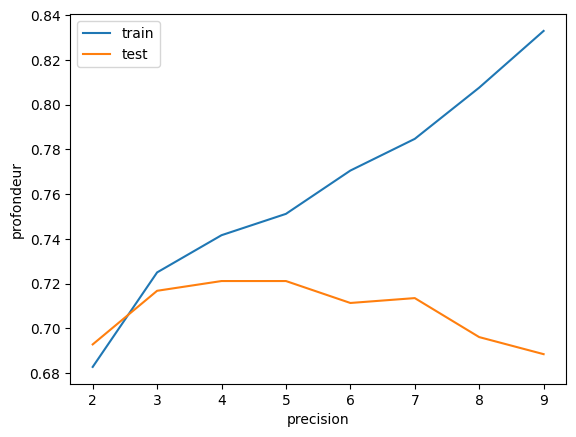

In [20]:
for i in range(20,81,10):
    print(i,'%',100-i,'%')
    X_train,Y_train,X_test,Y_test = partitionnement(datax,datay,i)
    axe_x = [k for k in range(2,10)]
    axe_y_train = []
    axe_y_test = []
    for j in range(2,10):
        dt = DTgen(X_train,Y_train,j)
        axe_y_train.append(dt.score(X_train,Y_train))
        axe_y_test.append(dt.score(X_test,Y_test))
        
    plt.plot(axe_x,axe_y_train,label='train')
    plt.plot(axe_x,axe_y_test,label='test')
    plt.xlabel('precision')
    plt.ylabel('profondeur')
    plt.legend()
    plt.show()
    plt.close()

Alors que la precision sur les données train ne fait qu'augmenté en fonction de la profondeur de l'arbre, 
la précision en test atteint son maximum pour une profondeur de 5 puis décroit. 
Il existe une divergence à 5 entre les 2 courbes qui sont plutot superposable lorsque le pourcentage de train est grand.
en effet il existe une difference de precision entre train et test pour une profondeur <5 lorsque le train est petit

Après une profondeur de 5 il existe du surapprentissage

lorsque le train est petit l'erreur semble rester assez stable contrairement à un train grand où l'erreur augmente progressivement après une profondeur de 5.

Dans un train petit la generalisation est mediocre et donc moins sensible à la profondeur contrairement à un train grand qui sera plus sensible à la profondeur de l'arbre


Dans la fonction utiliser il existe un autre hyperparametre: le nombre minimum d'exemple par noeud. On pourrait aussi optimiser le gain d’entropie minimal .
deplus on a utiliser le test pour effectuer le choix de nos hyperparametre ce qui n'est pas la bonne pratique.

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores=[]
mean =[]
std=[]
mean_max=0
std_max=500
for i in range(1, 15):
    dt = DTree()
    dt.max_depth = i
    dt.min_samples_split = 2
    scores_list = cross_val_score(dt, datax, datay, cv=5)
    mean.append(np.mean(scores_list))
    std.append(np.std(scores_list))
    print(f"Max_depth : {i}, Mean : {np.mean(scores_list)}, Std : {np.std(scores_list)}")
    if np.mean(scores_list) > mean_max:
        mean_max = np.mean(scores_list)
        mean_max_ind = i
    if np.std(scores_list) < std_max:
        std_max = np.std(scores_list)
        std_max_ind = i

print(f'mean_max: {mean_max},indice : {mean_max_ind }')
print(f'std_max: {std_max},indice : {std_max_ind}')
axe = [i for i in range(1, 15)]
print(f'moyenne{mean}')

Max_depth : 1, Mean : 0.6418112961893834, Std : 0.024537038449211176
Max_depth : 2, Mean : 0.6819255267840809, Std : 0.021566410074660182
Max_depth : 3, Mean : 0.7069961487563643, Std : 0.008406585969767856
Max_depth : 4, Mean : 0.7141918684352453, Std : 0.007821565348296209
Max_depth : 5, Mean : 0.7202966004043687, Std : 0.010229827869529706
Max_depth : 6, Mean : 0.7216040275312839, Std : 0.010854568149553386
Max_depth : 7, Mean : 0.7218235555460522, Std : 0.004368196862701903
Max_depth : 8, Mean : 0.7159355005785181, Std : 0.01355153328816688
Max_depth : 9, Mean : 0.7102688743012049, Std : 0.013702583536522683
Max_depth : 10, Mean : 0.7080857109595321, Std : 0.014260203076213835
Max_depth : 11, Mean : 0.695662658617306, Std : 0.015954772767834104
Max_depth : 12, Mean : 0.7017652523265456, Std : 0.011719090509583268
Max_depth : 13, Mean : 0.6947897734157277, Std : 0.011443476163523954
Max_depth : 14, Mean : 0.6893400617244353, Std : 0.006209462978883276
mean_max: 0.7218235555460522,in

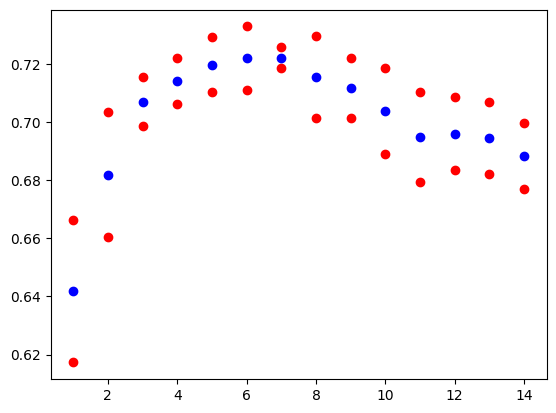

In [22]:
mean = np.array(mean)
std = np.array(std)

plt.scatter(axe, mean+std, c='red')
plt.scatter(axe, mean-std, c='red')
plt.scatter(axe, mean, c='blue')
plt.show()
plt.close()

la meilleure profondeur avec la validation croisée semble etre 7 avec une moyenne maximale et un ecart type minimal

In [23]:
#from sklearn.model_selection import GridSearchCV
#model = GridSearchCV( )